In [1]:
from connec_functions import execute_to_df, generate_sparql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Affliation information
This notebook gives an overview of standardardized affiliation information that was manually curated in previous LifeWatch users analyses.

In [2]:
reference_info = execute_to_df("0_reference_info.sparql")

In [3]:
#explore 
reference_info

,standard_affiliation,name,qh,group,flemish,country_name,country_identifier,country_code2,country_code3,country_id
0,https://edmo.seadatanet.org/report/422,VLIZ vzw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://marineinfo.org/id/institute/1883,Royal Belgian Institute of Natural Sciences (R...,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Research_institute,true,Kingdom of Belgium,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
2,https://marineinfo.org/id/institute/5443,INBO Research Institute for Nature and Forest,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Research_institute,true,Kingdom of Belgium,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
3,http://lifewatch-user-analysis-2023/affiliatio...,personal,http://lifewatch.org/ns/Civil_society,http://lifewatch.org/ns/personal_interest,NaN,,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,,,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
4,https://marineinfo.org/id/institute/36,VLIZ Flanders Marine Institute,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Research_institute,true,Kingdom of Belgium,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
...,...,...,...,...,...,...,...,...,...,...
2853,https://marineinfo.org/id/institute/14067,Acharya Nagarjuna University - Department of Z...,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/University,NaN,Republic of India,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,IN,IND,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
2854,https://marineinfo.org/id/institute/6463,University of La Laguna,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/University,NaN,Kingdom of Spain,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,ES,ESP,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
2855,https://marineinfo.org/id/institute/5688,University of Angers,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/University,NaN,French Republic,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,FR,FRA,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
2856,http://lifewatch-user-analysis-2023/affiliatio...,University of Basel - Faculty of Business & Ec...,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/University,NaN,Swiss Confederation,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,CH,CHE,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...


In [4]:
reference_info.groupby('name').nunique()

,standard_affiliation,qh,group,flemish,country_name,country_identifier,country_code2,country_code3,country_id
name,,,,,,,,,
3Landesmuseen Braunschweig,1,1,1,0,1,1,1,1,1
3T Software Labs GmbH,1,1,1,0,1,1,1,1,1
4C Offshore Ltd.,1,1,1,0,1,1,1,1,1
?skenderun Technical University ISTE,1,1,1,0,1,1,1,1,1
A Zero solution,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
�VLIZ Alien Species Consortium� Expert Group,1,1,1,1,1,1,1,1,1
�bo Akademi University,1,1,1,0,1,1,1,1,1
�bo Akademi University - Department of Bioscience Environment and Marine Biology,1,1,1,0,1,1,1,1,1


In [5]:
## for internal check
# affiliations with marineinfo-identifier
marineinfo_affils = reference_info[reference_info["standard_affiliation"].str.contains("https://marineinfo.org/id/institute/")]
m_affil = marineinfo_affils.groupby("standard_affiliation").nunique().sum()['name']

# affiliations with ROR-identifier
ror_affils = reference_info[reference_info["standard_affiliation"].str.contains("https://ror.org/")]
r_affil = ror_affils.groupby("standard_affiliation").nunique().sum()['name']

# affiliations with another identifier
other_affils = reference_info[reference_info["standard_affiliation"].str.contains("/affiliation/")]
o_affil = other_affils.groupby("standard_affiliation").nunique().sum()['name']

print(m_affil ,r_affil ,o_affil)
#reference_info.groupby('name').nunique()

1126 579 1110


### Quadruple Helix distribution

In [6]:
# Table
qh_dist = reference_info.groupby('qh').nunique()
qh_dist = qh_dist.rename(index={
    'http://lifewatch.org/ns/Civil_society': 'Civil_society', 
    'http://lifewatch.org/ns/Industry': 'Industry', 
    'http://lifewatch.org/ns/Policy': 'Policy',
    'http://lifewatch.org/ns/Science': 'Science'})

qh_dist[['standard_affiliation']].rename(columns={'standard_affiliation':'Affiliation count'}).transpose()

qh,Civil_society,Industry,Policy,Science
Affiliation count,90,236,193,2235


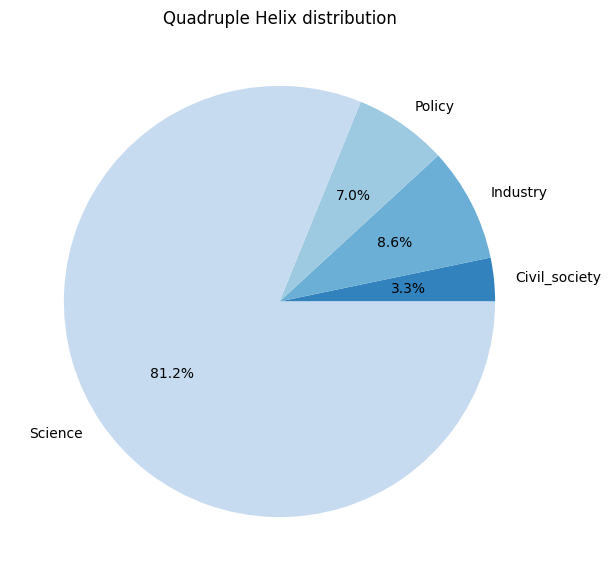

In [7]:
# Graph
cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(4))
pie_qh = qh_dist.plot(kind='pie', y='standard_affiliation', figsize=(7, 7), autopct='%1.1f%%', colors=colors, legend=False)

pie_qh.set_title('Quadruple Helix distribution')
pie_qh.set_ylabel('')
plt.show()

In [8]:
qh_group_dist = reference_info.groupby(['qh', 'group']).nunique()
# rename index for better readability
qh_group_dist = qh_group_dist.rename(index={
    'http://lifewatch.org/ns/Civil_society': 'Civil_society', 
    'http://lifewatch.org/ns/Industry': 'Industry', 
    'http://lifewatch.org/ns/Policy': 'Policy',
    'http://lifewatch.org/ns/Science': 'Science', 
    
    'http://lifewatch.org/ns/Creative_body': 'Creative_body',
    'http://lifewatch.org/ns/Educational_school' : 'Educational_school',
    'http://lifewatch.org/ns/NGO': 'NGO', 
    'http://lifewatch.org/ns/Non-profit_organization': 'Non-profit_organization',
    'http://lifewatch.org/ns/Other': 'Other',
    'http://lifewatch.org/ns/personal_interest': 'personal_interest',
    'http://lifewatch.org/ns/Company': 'Company',
    'http://lifewatch.org/ns/EU_institution': 'EU_institution',
    'http://lifewatch.org/ns/Consultancy': 'Consultancy',
    'http://lifewatch.org/ns/Governmental_body': 'Governmental_body',
    'http://lifewatch.org/ns/Defence': 'Defence',
    'http://lifewatch.org/ns/Intergovernmental_body': 'Intergovernmental_body',
    'http://lifewatch.org/ns/Governmental_body 	': 'Governmental_body', 
    'http://lifewatch.org/ns/Other_public_authorities': 'Other_public_authorities', 
    'http://lifewatch.org/ns/Data_infrastructure': 'Data_infrastructure', 
    'http://lifewatch.org/ns/International_programme': 'International_programme', 
    'http://lifewatch.org/ns/Museum': 'Museum',
    'http://lifewatch.org/ns/UN_organization': 'UN_organization',
    'http://lifewatch.org/ns/Scientific_journal': 'Scientific_journal',
    'http://lifewatch.org/ns/Research_institute':'Research_institute',
    'http://lifewatch.org/ns/Research_network':'Research_network',
    'http://lifewatch.org/ns/University':'University'
    
})

In [9]:
# Table
qh_group_dist[['standard_affiliation']].rename(columns={'standard_affiliation':'Affiliation count'})

Affiliation count
qh            group                                      
Civil_society Creative_body                            11
              Educational_school                        3
              NGO                                      11
              Non-profit_organization                  46
              Other                                    17
              personal_interest                         2
Industry      Company                                 171
              Consultancy                              65
              Research_institute                        1
Policy        Company                                   1
              Defence                                   6
              EU_institution                            6
              Governmental_body                       139
              Intergovernmental_body                   11
              Non-profit_organization                   1
              Other_public_authorities                 24
              Research_institute                        3
              UN_organization                           5
Science       Company                                   1
              Creative_body                             1
              Data_infrastructure                      65
              Governmental_body                         3
              International_programme                  13
              Museum                                  124
              Research_institute                      775
              Research_network                         30
              Scientific_journal                        5
              University                             1227

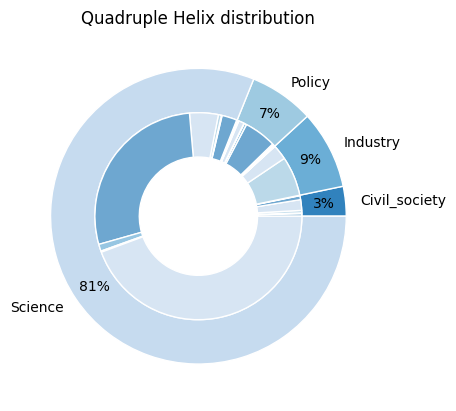

In [10]:
# Graph
df = qh_group_dist.copy().reset_index()
df_qh = df.groupby('qh', sort=False)['standard_affiliation'].sum()
fig, ax = plt.subplots()

size = 0.3

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(4))
#inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
inner_colors = outer_colors.copy()
inner_colors[:, -1] *= 0.7

ax.pie(df_qh, labels=df_qh.index , radius=1, colors=outer_colors, autopct='%1.0f%%', pctdistance=0.85, wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(df['standard_affiliation'], radius=1-size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Quadruple Helix distribution')
plt.show()

### The number of affiliations per country

In [11]:
# In the reference info there are 2 species cases for country:
#      <https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU> = EU affiliations 
#      <https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA> = personal affiliations 

reference_info.loc[ reference_info['country_identifier'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU' , 'country_name'] = 'Europe'
reference_info.loc[ reference_info['country_identifier'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU' , 'country_code2'] = 'EU'
reference_info.loc[ reference_info['country_identifier'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU' , 'country_code3'] = 'EUR'

reference_info.loc[ reference_info['country_identifier'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA' , 'country_name'] = 'personal'
reference_info.loc[ reference_info['country_identifier'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA' , 'country_code2'] = 'personal'
reference_info.loc[ reference_info['country_identifier'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA' , 'country_code3'] = 'personal'

In [12]:
# wrangle dataframe into right format 
count_info = reference_info.groupby('country_code2').count()
count_info['non-flemish'] = 0
count_info['other'] = count_info['standard_affiliation']

count_info.loc['BE', 'non-flemish'] = count_info.loc['BE', 'standard_affiliation'] - count_info.loc['BE', 'flemish']
count_info.loc['BE', 'other'] = 0

#### Top 20 countries

In [13]:
#subset to top 20 of countries with highest affliation count
count_info_top20 = count_info.sort_values(by='standard_affiliation', ascending=False)
count_info_top20 = count_info_top20.head(20)
count_info_top20.sort_values(by='standard_affiliation', ascending=True, inplace=True)
count_info_top20_reduced = count_info_top20[['flemish', 'non-flemish', 'other']]

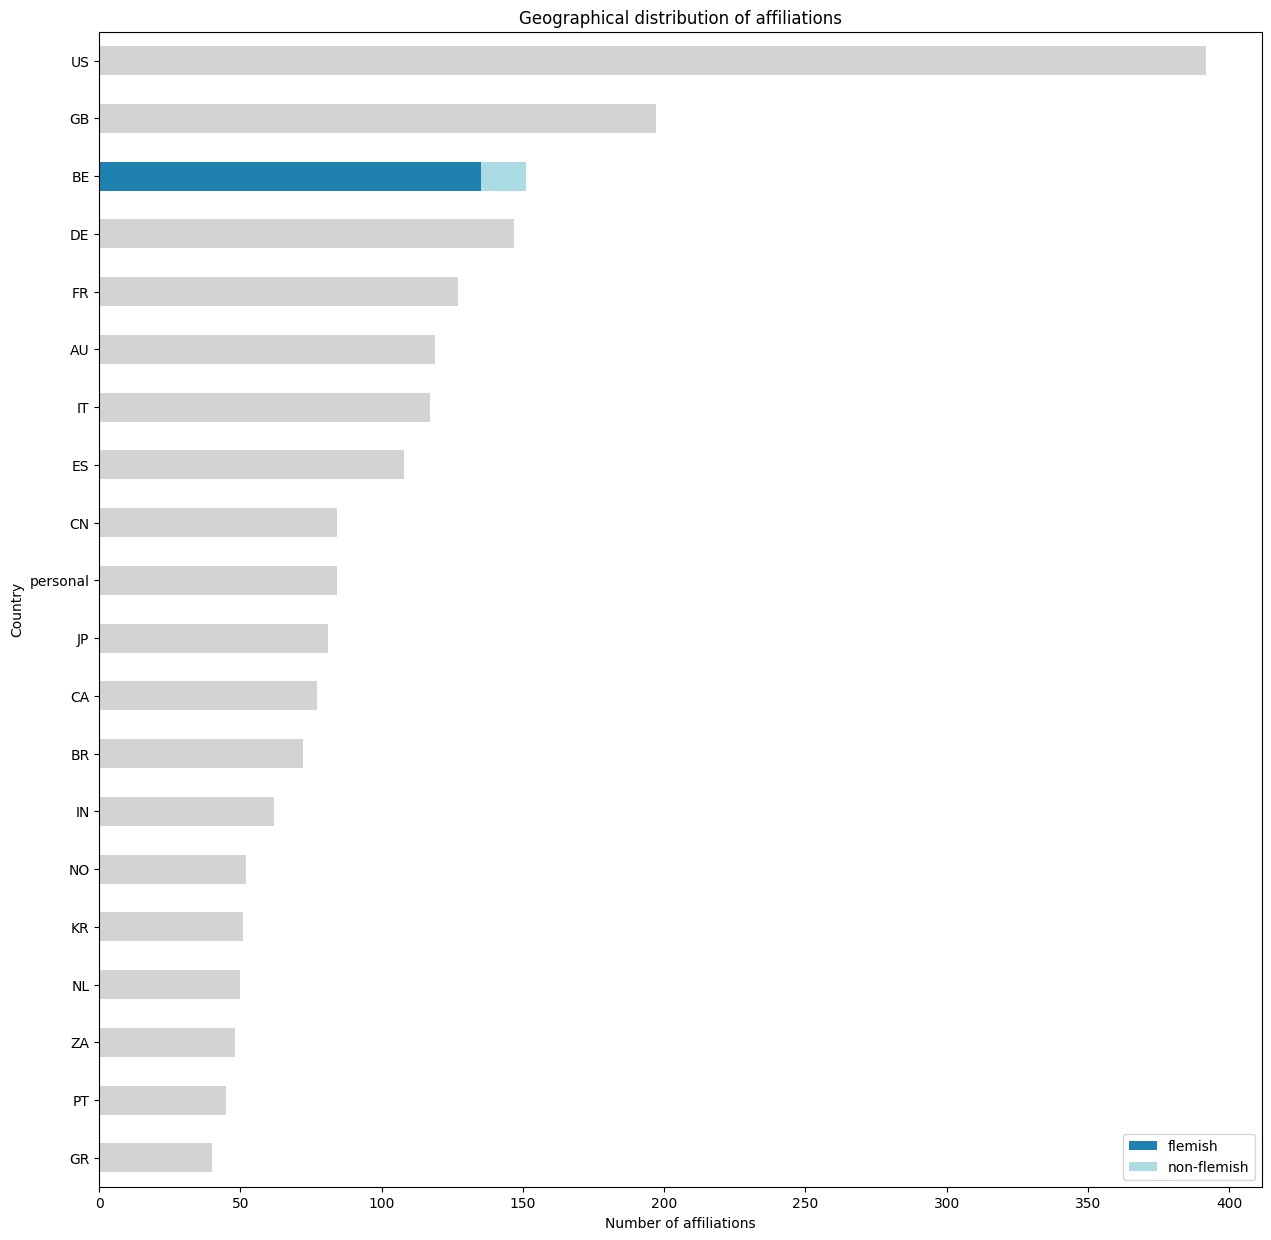

In [14]:
# Horizontal bar chart of number of affiliations per country, with a distinction between flemish and non-flemish for Belgium affiliations - for top-50 of countries
colors = ['#1e81b0', '#abdbe3', 'lightgrey']
barh_top20 = count_info_top20_reduced.plot(kind='barh', y=['flemish','non-flemish', 'other'], stacked=True, color=colors, figsize=(15, 15))

barh_top20.set_title('Geographical distribution of affiliations')
barh_top20.set_xlabel('Number of affiliations')
barh_top20.set_ylabel('Country')
barh_top20.legend(['flemish', 'non-flemish'], loc="lower right")
plt.show()

#### All countries

In [15]:
#(all countries)
count_info.sort_values(by='standard_affiliation', ascending=True, inplace=True)
count_info_reduced = count_info[['flemish', 'non-flemish', 'other']]

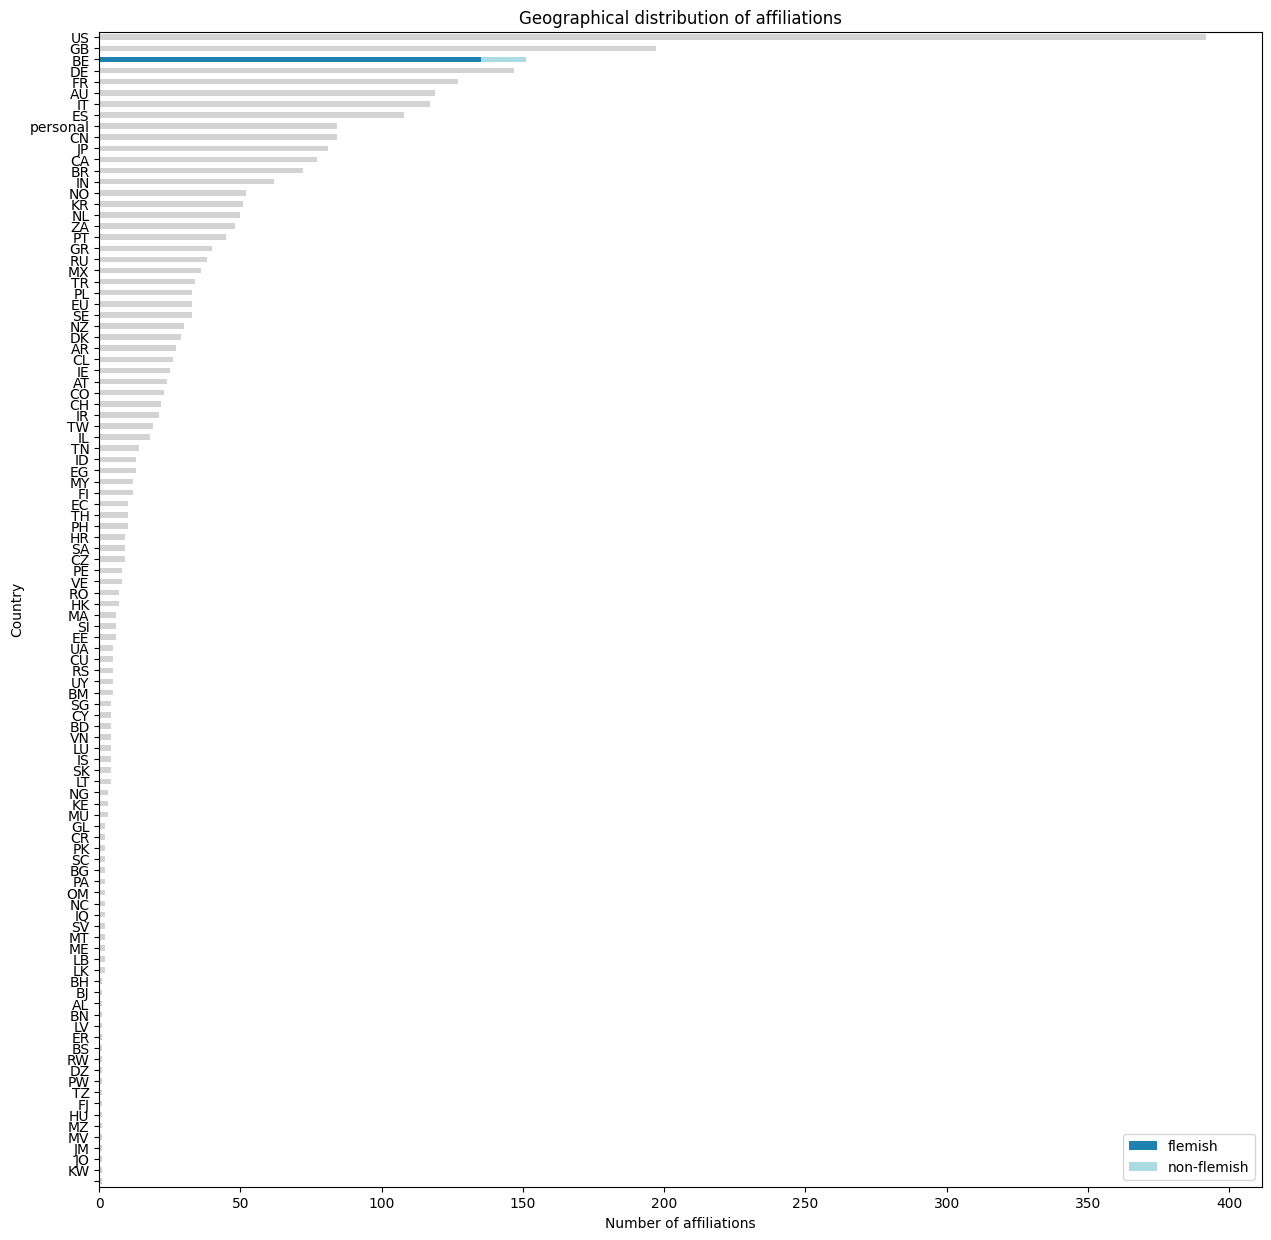

In [16]:
# Horizontal bar chart of number of affiliations per country, with a distinction between flemish and non-flemish for Belgium affiliations - for all countries
colors = ['#1e81b0', '#abdbe3', 'lightgrey']
barh_all = count_info_reduced.plot(kind='barh', y=['flemish','non-flemish', 'other'], stacked=True, color=colors, figsize=(15, 15))

barh_all.set_title('Geographical distribution of affiliations')
barh_all.set_xlabel('Number of affiliations')
barh_all.set_ylabel('Country')
barh_all.legend(['flemish', 'non-flemish'], loc="lower right")
plt.show()